In [10]:
import argparse
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from spectral import analysis as spectral_analysis, synthesis as spectral_synthesis
from audio_transport import interpolate
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from generate_audio import generate_sine_wave

(0.0, 100.0)

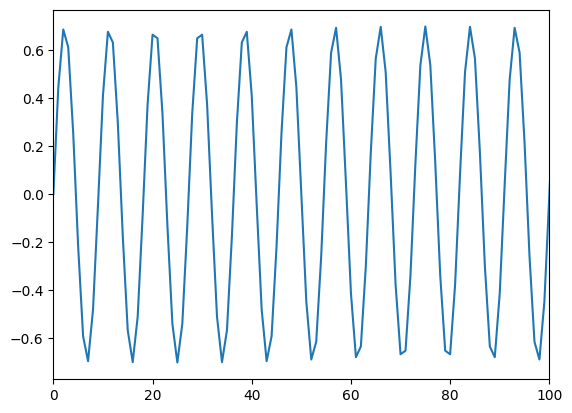

In [15]:
audio_left, sample_rate = sf.read("input_file1.wav", always_2d=True)
audio_right, sample_rate = sf.read("input_file2.wav", always_2d=True)
plt.plot(audio_left)
plt.xlim(0, 100)

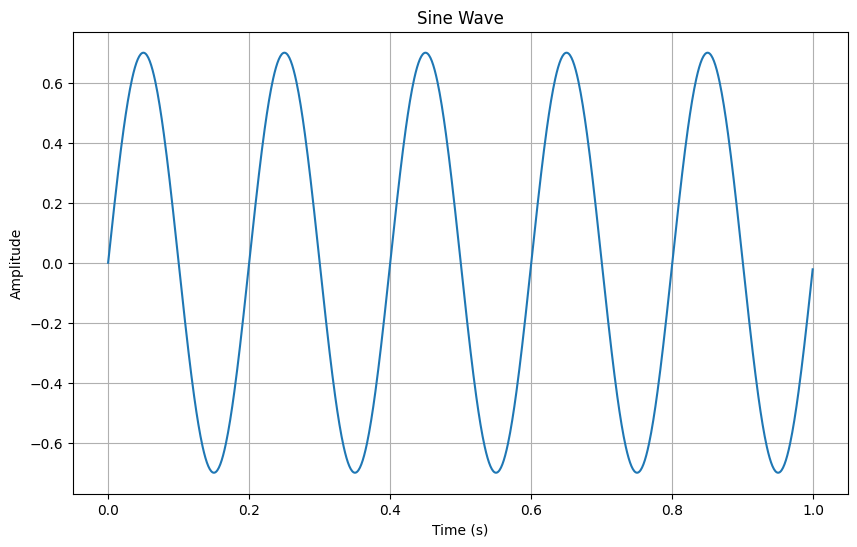

In [11]:
# Parameters for the sine wave
frequency = 5  # Frequency in Hz
duration = 1   # Duration in seconds
sample_rate = 1000  # Sample rate in Hz
amplitude = 0.7  # Amplitude of the sine wave

# Generate the sine wave
sine_wave = generate_sine_wave(frequency, duration, sample_rate, amplitude)

# Time axis
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Plot the sine wave
plt.figure(figsize=(10, 6))
plt.plot(t, sine_wave)
plt.title('Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


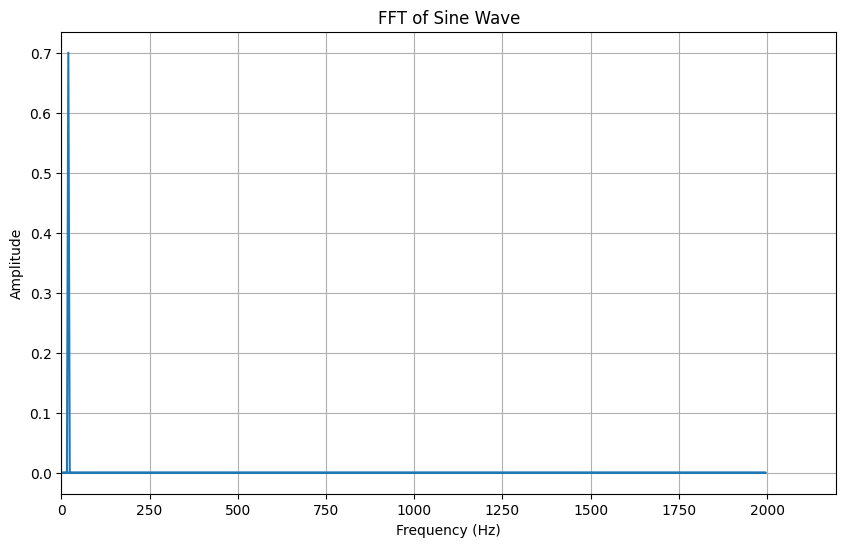

In [17]:
# Compute the FFT
N = len(sine_wave)
T = 1.0 / sample_rate
yf = np.fft.fft(sine_wave)
xf = np.fft.fftfreq(N, T)

# Plot the FFT
plt.figure(figsize=(10, 6))
plt.plot(xf, 2.0/N * np.abs(yf))
plt.title('FFT of Sine Wave')
plt.xlabel('Frequency (Hz)')
plt.xlim(0)
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

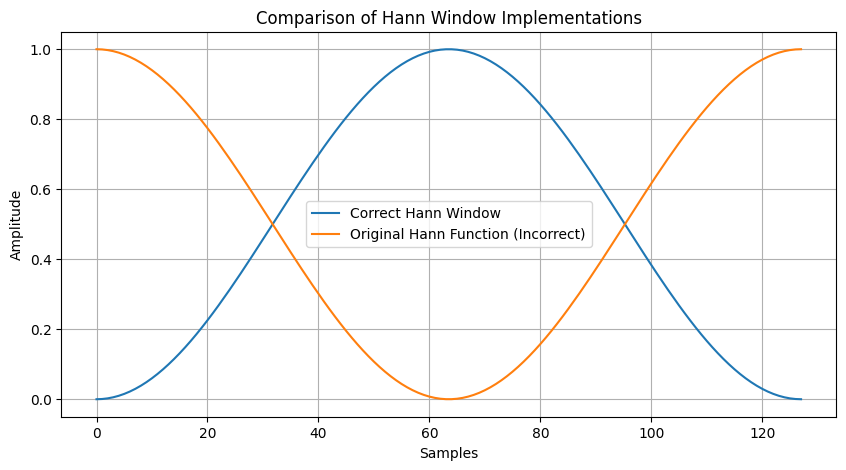

In [18]:
N = 128
n = np.arange(N)

# Hann windows
correct_hann = 0.5 * (1 - np.cos(2 * np.pi * n / (N - 1)))
wrong_hann = 0.5 + 0.5 * np.cos(2 * np.pi * n / (N - 1))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(n, correct_hann, label="Correct Hann Window")
plt.plot(n, wrong_hann, label="Original Hann Function (Incorrect)")
plt.legend()
plt.title("Comparison of Hann Window Implementations")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()
plt.show()
